In [1]:
# Import the usual libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
#import matplotlib.patches as mpatches

# Enable inline plotting
%matplotlib inline

In [2]:
# jedi 0.14.1 tab completion fails; will be fixed in 0.14.2
import jedi
if jedi.__version__ == '0.14.1':
    %config Completer.use_jedi = False
    
# Progress bar
from tqdm.auto import trange, tqdm

In [3]:
import pynrc
from pynrc import nrc_utils
from pynrc import psfs
from pynrc import read_filter

In [4]:
import pysiaf
siaf_nrc = pysiaf.Siaf('NIRCam')

In [5]:
siaf_nrc.generate_toc()

In [52]:
bp_k = pynrc.bp_2mass('k')
sp1 = pynrc.stellar_spectrum('G5V', 5, 'vegamag', bp_k)
sp2 = pynrc.stellar_spectrum('G5V', 5, 'vegamag', bp_k)
nrc = pynrc.obs_hci(sp1, sp2, 100, filter='F444W', pupil='CIRCLYOT', mask='MASK430R', 
                    fov_pix=320, oversample=2, apname = 'NRCA5_MASK430R')

[     pynrc:INFO] Initializing SCA 485/A5
[     pynrc:INFO] Updating PSF coeff with fov_pix=320 and oversample=2
[     pynrc:INFO] Initializing SCA 485/A5


In [54]:
nrc.wfe_field = True

[     pynrc:INFO] Updating PSF coeff with fov_pix=320 and oversample=2
[     pynrc:INFO] Calculating WFE Drift for fov_pix=320 and oversample=2
[     pynrc:INFO] Calculating WFE Drift for fov_pix=320 and oversample=2
[     pynrc:INFO] Calculating SI WFE Field for fov_pix=320 and oversample=2


In [55]:
nrc.add_planet(rtheta=(2,45), runits='asec')

In [56]:
nrc.update_detectors(read_mode='MEDIUM8', ngroup=10, nint=20)

[     pynrc:INFO] Initializing SCA 485/A5


In [57]:
nrc.multiaccum_times

{'t_frame': 1.06904,
 't_group': 10.6904,
 't_int': 104.76592,
 't_exp': 2095.3184,
 't_acq': 2117.0976,
 't_int_tot1': 105.85488,
 't_int_tot2': 105.85488}

In [58]:
res = nrc.calc_contrast(nsig=5)

In [59]:
nrc.wfe_ref_drift = 50
nrc.wfe_roll_drift = 2

In [60]:
res2 = nrc.calc_contrast(nsig=5)

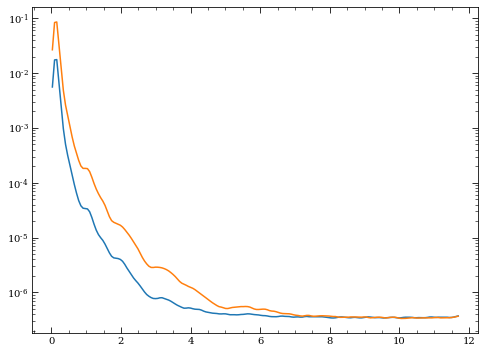

In [61]:
plt.semilogy(res[0], res[1])
plt.semilogy(res2[0], res2[1])

(21.8642298309591, 6.992122174746951)

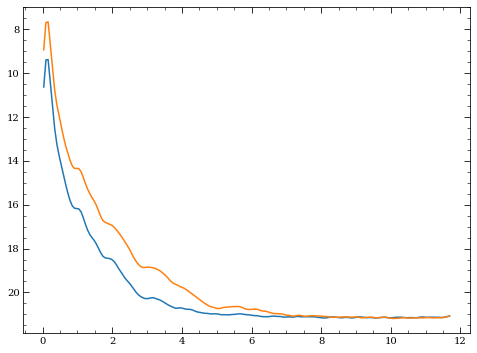

In [62]:
fig, ax = plt.subplots(1,1)
ax.plot(res[0], res[2])
ax.plot(res2[0], res2[2])

ax.set_ylim(ax.get_ylim()[::-1])

In [7]:
pynrc.setup_logging('WARNING', verbose=False)

In [8]:
nrc.wfe_field = True

In [9]:
psf = nrc.gen_offset_psf(1,0)

In [24]:
nrc.offset_bar(nrc.filter,'MASKLWB')

(1.043199999999998, -90.0)

In [10]:
nrc.get_psf_cen()

(160.0, 160.0)

In [17]:
nrc.siaf_ap.reference_point('det')

(1075.5013573472918, 1673.4986670173655)

In [24]:
nrc_utils.offset_bar('F444W', 'LWB')

(0.7678800000000011, 90.0)

In [36]:
list(siaf_nrc.apernames)

['NRCA1_FULL_OSS',
 'NRCA2_FULL_OSS',
 'NRCA3_FULL_OSS',
 'NRCA4_FULL_OSS',
 'NRCA5_FULL_OSS',
 'NRCB1_FULL_OSS',
 'NRCB2_FULL_OSS',
 'NRCB3_FULL_OSS',
 'NRCB4_FULL_OSS',
 'NRCB5_FULL_OSS',
 'NRCALL_FULL',
 'NRCAS_FULL',
 'NRCA1_FULL',
 'NRCA2_FULL',
 'NRCA3_FULL',
 'NRCA4_FULL',
 'NRCA5_FULL',
 'NRCBS_FULL',
 'NRCB1_FULL',
 'NRCB2_FULL',
 'NRCB3_FULL',
 'NRCB4_FULL',
 'NRCB5_FULL',
 'NRCA1_SUB160',
 'NRCA2_SUB160',
 'NRCA3_SUB160',
 'NRCA4_SUB160',
 'NRCA5_SUB160',
 'NRCA1_SUB320',
 'NRCA2_SUB320',
 'NRCA3_SUB320',
 'NRCA4_SUB320',
 'NRCA5_SUB320',
 'NRCA1_SUB640',
 'NRCA2_SUB640',
 'NRCA3_SUB640',
 'NRCA4_SUB640',
 'NRCA5_SUB640',
 'NRCB1_SUB160',
 'NRCB2_SUB160',
 'NRCB3_SUB160',
 'NRCB4_SUB160',
 'NRCB5_SUB160',
 'NRCB1_SUB320',
 'NRCB2_SUB320',
 'NRCB3_SUB320',
 'NRCB4_SUB320',
 'NRCB5_SUB320',
 'NRCB1_SUB640',
 'NRCB2_SUB640',
 'NRCB3_SUB640',
 'NRCB4_SUB640',
 'NRCB5_SUB640',
 'NRCA5_GRISM256_F322W2',
 'NRCA5_GRISM128_F322W2',
 'NRCA5_GRISM64_F322W2',
 'NRCA5_GRISM256_F277W',
 '

In [32]:
list(siaf_nrc.apernames)

['NRCA1_FULL_OSS',
 'NRCA2_FULL_OSS',
 'NRCA3_FULL_OSS',
 'NRCA4_FULL_OSS',
 'NRCA5_FULL_OSS',
 'NRCB1_FULL_OSS',
 'NRCB2_FULL_OSS',
 'NRCB3_FULL_OSS',
 'NRCB4_FULL_OSS',
 'NRCB5_FULL_OSS',
 'NRCALL_FULL',
 'NRCAS_FULL',
 'NRCA1_FULL',
 'NRCA2_FULL',
 'NRCA3_FULL',
 'NRCA4_FULL',
 'NRCA5_FULL',
 'NRCBS_FULL',
 'NRCB1_FULL',
 'NRCB2_FULL',
 'NRCB3_FULL',
 'NRCB4_FULL',
 'NRCB5_FULL',
 'NRCA1_SUB160',
 'NRCA2_SUB160',
 'NRCA3_SUB160',
 'NRCA4_SUB160',
 'NRCA5_SUB160',
 'NRCA1_SUB320',
 'NRCA2_SUB320',
 'NRCA3_SUB320',
 'NRCA4_SUB320',
 'NRCA5_SUB320',
 'NRCA1_SUB640',
 'NRCA2_SUB640',
 'NRCA3_SUB640',
 'NRCA4_SUB640',
 'NRCA5_SUB640',
 'NRCB1_SUB160',
 'NRCB2_SUB160',
 'NRCB3_SUB160',
 'NRCB4_SUB160',
 'NRCB5_SUB160',
 'NRCB1_SUB320',
 'NRCB2_SUB320',
 'NRCB3_SUB320',
 'NRCB4_SUB320',
 'NRCB5_SUB320',
 'NRCB1_SUB640',
 'NRCB2_SUB640',
 'NRCB3_SUB640',
 'NRCB4_SUB640',
 'NRCB5_SUB640',
 'NRCA5_GRISM256_F322W2',
 'NRCA5_GRISM128_F322W2',
 'NRCA5_GRISM64_F322W2',
 'NRCA5_GRISM256_F277W',
 '

In [34]:
'NRCA1_SUB160' in list(siaf_nrc.apernames)

True

In [10]:
# PSF setup
filter = 'F430M'
kwargs = {}
kwargs['pupil'] = 'CIRCLYOT'
kwargs['mask'] = 'MASK430R'

kwargs['force']     = True
kwargs['save']      = False
kwargs['save_name'] = None

bp = read_filter(filter)
channel = 'SW' if bp.avgwave() < 24000 else 'LW'
module = kwargs.get('module', 'A') # If not specified, choose 'A'
kwargs['module'] = module
# Check if coronagraphy
pupil = kwargs.get('pupil', 'CLEAR') # If not specified, choose CLEAR
kwargs['pupil'] = pupil

kwargs['detector'] = None
kwargs['detector_position'] = None
kwargs['include_si_wfe'] = True

kwargs['use_legendre'] = True
fov_pix = kwargs['fov_pix'] = 33
oversample = kwargs['oversample'] = 2

kwargs['opd'] = ('OPD_RevW_ote_for_NIRCam_requirements.fits.gz', 0)
kwargs['jitter'] = 'gaussian'
kwargs['jitter_sigma'] = 0.007

apname = 'NRCA5_MASK430R'

In [11]:
kwargs

{'pupil': 'MASK430R',
 'force': True,
 'save': False,
 'save_name': None,
 'module': 'A',
 'detector': None,
 'detector_position': None,
 'include_si_wfe': True,
 'use_legendre': True,
 'fov_pix': 33,
 'oversample': 2,
 'opd': ('OPD_RevW_ote_for_NIRCam_requirements.fits.gz', 0),
 'jitter': 'gaussian',
 'jitter_sigma': 0.007}

In [31]:
def coron_detector(mask, module, channel=None):
    
    if channel is None:
        if ('210R' in mask) or ('SW' in mask):
            channel = 'SW'
        else:
            channel = 'LW'
    elif (channel=='SW') and ('430R' in mask):
        raise AttributeError("MASK430R not valid for SW channel")
    
    if channel=='LW':
        detname = module + '5'
    else:        
        if module=='A':
            detname = 'A2' if mask[-1]=='R' else 'A4'
        else:
            detname = 'B1' if mask[-1]=='R' else 'B3'
            
    return detname

In [29]:
coron_detector('MASK210R', 'B')

'B1'

In [37]:
siaf_ap = siaf_nrc[apname]

In [38]:
siaf_ap.DDCName

'NRC_MASK430R'

In [ ]:
def _wrap_coron_coeff_for_mp(arg):
    args, kwargs = arg

    apname  = kwargs['apname']
    det     = kwargs['detector']
    det_pos = kwargs['detector_position']
    v2, v3  = kwargs['coords']

    print()
    
    _log.info('V2/V3 Coordinates and det pixel (sci) on {}/{}: ({:.2f}, {:.2f}), ({:.1f}, {:.1f})'
        .format(det, apname, v2/60, v3/60, det_pos[0], det_pos[1]))

    cf, _ = gen_psf_coeff(*args, **kwargs)
    return cf

In [ ]:
def coron_coeff_resid(filter_or_bp, coeff0, force=False, save=True, save_name=None, 
    return_raw=False, **kwargs):
    """PSF Coefficient Mod w.r.t. Center Coronagraph Location

    Keyword Arguments match those in :func:`gen_psf_coeff`.

    Parameters
    ----------
    filter : str
        Name of a filter.
    force : bool
        Forces a recalcuation of coefficients even if saved
        PSF already exists. (default: False)
    save : bool
        Save the resulting WFE drift coefficents to a file?
        (default: True)
    save_name : str, None
        Full path name of save file (.npy) to save/load.
        If None, then a name is automatically generated,
        matching the :func:`gen_psf_coeff` function.


    Example
    -------
    Generate PSF coefficient at bar_offset=0, generate position modifications,
    then use these results to create a PSF at some arbitrary offset location.
    (pseudo-code)

    >>> fpix, osamp = (320, 2)
    >>> filt, pupil, mask = ('F430M', 'WEDGELYOT', 'MASKLWB')
    >>> coeff    = gen_psf_coeff(filt, pupil, mask, fov_pix=fpix, oversample=osamp)
    >>> cf_resid = wedge_coeff(filt, pupil, mask, fov_pix=fpix, oversample=osamp)

    >>> # The narrow location (arcsec)
    >>> bar_offset = 8
    >>> cf_fit = cf_resid.reshape([cf_resid.shape[0], -1])
    >>> cf_mod = jl_poly(np.array([bar_offset]), cf_fit).reshape(coeff.shape)
    >>> cf_new = coeff + cf_mod
    >>> psf    = gen_image_coeff(filt, pupil, mask, coeff=cf_new, fov_pix=fpix, oversample=osamp)

    """

    import pysiaf
    siaf_nrc = pysiaf.Siaf('NIRCam')
    
    kwargs['force']     = True
    kwargs['save']      = False
    kwargs['save_name'] = None

    if return_raw:
        save = False
        force = True
        _log.warn("return_raw=True; Setting 'save=False' and 'force=True'")
        
    # Check 
    pupil = kwargs.get('pupil', None)
    if (pupil is None) or ('LYOT' not in pupil):
        raise AttributeError("pupil keyword must be either 'CIRCLYOT' or 'WEDGELYOT'.")
    mask = kwargs.get('mask', None)
    if (mask is None) or ('MASK' not in mask):
        raise AttributeError("mask keyword must set to bar or round occulting mask.")
        
    # Get filter throughput and create bandpass
    if isinstance(filter_or_bp, six.string_types):
        filter = filter_or_bp
        bp = read_filter(filter, **kwargs)
    else:
        bp = filter_or_bp
        filter = bp.name
    channel = 'SW' if bp.avgwave() < 24000 else 'LW'
    # If module not specified, choose 'A'
    module = kwargs.get('module', 'A') 
    kwargs['module'] = module
    
    # Set a default fov_pix and oversample
    fov_pix = kwargs['fov_pix'] if 'fov_pix' in list(kwargs.keys()) else 33
    oversample = kwargs['oversample'] if 'oversample' in list(kwargs.keys()) else 4
    
    # We're just doing coeff _residuals_, so it SI WFE doesn't need to be enabled
    # since we get the same answer both ways. Turning it off speeds of the PSF calculation.
    kwargs['include_si_wfe'] = False
    
    # Setting the apname is not really necessary since it's only there for SI WFE
    # but let's do it for completeness
    apname = kwargs.get('apname', None)
    if apname is None:
        detname = coron_detector(mask, module, channel=channel)
        apname = f'NRC{detname}_{mask}'
        kwargs['apname'] = apname
    # Check if apname is valid
    if apname not in list(siaf_nrc.apernames):
        _log.warn(f"Aperture name '{apname}' not a valid SIAF aperture")
        
    siaf_ap = siaf_nrc[apname]

    # Final filename to save coeff
    if save_name is None:
        # Name to save array of oversampled coefficients
        save_dir = conf.PYNRC_PATH + 'psf_coeffs/'
        # Create directory if it doesn't already exist
        if not os.path.isdir(save_dir):
            os.makedirs(save_dir)

        # Final filename to save coeff
        save_name = gen_psf_coeff(bp, return_save_name=True, **kwargs)
        save_name = os.path.splitext(save_name)[0] + '_cfcoron.npz'
        
    # Load file if it already exists
    if (not force) and os.path.exists(save_name):
        out = np.load(save_name)
        return out['arr_0'], out['arr_1'], out['arr_2']

    _log.warn('Generating offset-dependent coefficients. This may take some time...')

    
    rvals = [0,0.01,0.05,0.1,0.5,1.0,1.5,2.0,5]
    
    kwargs = []
    
    

    # Cycle through a list of bar offset locations
    values = np.arange(-8,8,1)
    nvals = len(values)

    # First is default value
    kwargs['include_si_wfe'] = False
    cf0, _ = gen_psf_coeff(filter, bar_offset=0, **kwargs)

    cf_offset = []
    for val in values:
        _log.debug('Bar Offset: {:.1f} arcsec'.format(val))
        kwargs['bar_offset'] = val

        cf, _ = gen_psf_coeff(filter, **kwargs)
        cf_offset.append(cf)

    cf_offset = np.array(cf_offset)

    # Get residuals
    cf_offset -= cf0

    # Fit each pixel with a polynomial and save the coefficient
    cf_offset = cf_offset.reshape([nvals, -1])
    cf_fit = jl_poly_fit(values, cf_offset, 4)
    cf_fit = cf_fit.reshape([-1, cf.shape[0], cf.shape[1], cf.shape[2]])

    if save:
        np.save(save_name, cf_fit)

    _log.warn('Done.')
    return cf_fit


In [13]:
coeff0 = psfs.gen_psf_coeff(filter, **kwargs)

[     pynrc:INFO] Generating but not saving new PSF coefficient
[     pynrc:INFO] Took 9.47 seconds to generate WebbPSF images


In [15]:
res = psfs.field_coeff_resid(filter, coeff0, return_raw=True, **kwargs)

[     pynrc:WARNING] return_raw=True; Setting save=False, force=True
[     pynrc:WARNING] Generating field-dependent coefficients. This may take some time...


[     pynrc:INFO] V2/V3 Coordinates and det pixel (sci) on NRCA5/NRCA5_FULL: (0.45, -8.39), (1957.9, 865.5)
[     pynrc:INFO] V2/V3 Coordinates and det pixel (sci) on NRCA5/NRCA5_FULL: (0.87, -8.78), (1561.1, 501.2)
[     pynrc:INFO] V2/V3 Coordinates and det pixel (sci) on NRCA5/NRCA5_FULL: (1.60, -9.22), (872.6, 83.1)
[     pynrc:INFO] V2/V3 Coordinates and det pixel (sci) on NRCA5/NRCA5_FULL: (0.88, -7.68), (1558.1, 1541.3)
[     pynrc:INFO] V2/V3 Coordinates and det pixel (sci) on NRCA5/NRCA5_FULL: (2.40, -8.08), (95.6, 1157.3)
[     pynrc:INFO] V2/V3 Coordinates and det pixel (sci) on NRCA5/NRCA5_FULL: (1.28, -7.26), (1176.0, 1941.6)
[     pynrc:INFO] Generating but not saving new PSF coefficient
[     pynrc:INFO] Generating but not saving new PSF coefficient
[     pynrc:INFO] Generating but not saving new PSF coefficient
[     pynrc:INFO] Generating but not saving new PSF coefficient
[     pynrc:INFO] Generating but not saving new PSF coefficient
[     pynrc:INFO] Generating but 

ValueError: operands could not be broadcast together with shapes (17,10,66,66) (2,) 

In [17]:
coeff0

(array([[[ 1.39750234e-06,  1.40985008e-06,  1.57977752e-06, ...,
           1.05970241e-06,  1.21448547e-06,  1.45022936e-06],
         [ 1.95705390e-06,  1.44616008e-06,  1.42597347e-06, ...,
           1.26773214e-06,  1.58964355e-06,  1.99801051e-06],
         [ 3.34821965e-06,  2.19784167e-06,  1.54019556e-06, ...,
           1.71662850e-06,  2.29026099e-06,  2.95397528e-06],
         ...,
         [ 3.33208331e-06,  2.18524492e-06,  1.28416960e-06, ...,
           1.60498962e-06,  2.35624928e-06,  3.04513439e-06],
         [ 1.96370387e-06,  1.21621943e-06,  8.99829628e-07, ...,
           9.89061281e-07,  1.54351511e-06,  2.13291395e-06],
         [ 1.10639695e-06,  8.56601126e-07,  9.26504225e-07, ...,
           6.11345997e-07,  9.39378264e-07,  1.40239038e-06]],
 
        [[-1.37239016e-06, -1.40486968e-06, -1.16958689e-06, ...,
          -8.78674178e-07, -8.32208630e-07, -8.98506485e-07],
         [-8.35515994e-07, -1.32358728e-06, -1.39145024e-06, ...,
          -9.02413920